In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
from time import time

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from pandas import DataFrame as DF
import numpy as np
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier

In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = []

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
df = DF.from_dict(data_dict).T
df

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,119292
CAUSEY RICHARD A,415189,1892,NaN,1868758,NaN,1000000,richard.causey@enron.com,NaN,-235000,2502063,...,58,NaN,49,307895,12,True,350000,1585,2502063,NaN
TAYLOR MITCHELL S,265214,533,227449,1092663,NaN,600000,mitchell.taylor@enron.com,NaN,NaN,3745048,...,0,3181250,29,NaN,0,False,NaN,300,563798,NaN
DONAHUE JR JEFFREY M,278601,865,NaN,875760,NaN,800000,jeff.donahue@enron.com,NaN,-300000,1080988,...,188,765920,22,891,11,False,NaN,772,315068,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     146 non-null    object
 1   to_messages                146 non-null    object
 2   deferral_payments          146 non-null    object
 3   total_payments             146 non-null    object
 4   loan_advances              146 non-null    object
 5   bonus                      146 non-null    object
 6   email_address              146 non-null    object
 7   restricted_stock_deferred  146 non-null    object
 8   deferred_income            146 non-null    object
 9   total_stock_value          146 non-null    object
 10  expenses                   146 non-null    object
 11  from_poi_to_this_person    146 non-null    object
 12  exercised_stock_options    146 non-null    object
 13  from_messages              146 non-null    object

In [5]:
type(df['deferral_payments']['METTS MARK']) #confirming that the NaN values are string

str

In [6]:
df=df.replace('NaN', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

In [7]:
#removing columns that have less than half of non-null values and email address
df=df.drop(columns=["loan_advances", "deferral_payments", "restricted_stock_deferred",
                    "deferred_income", "long_term_incentive", "director_fees", "email_address"])

In [8]:
corr = df.corr()

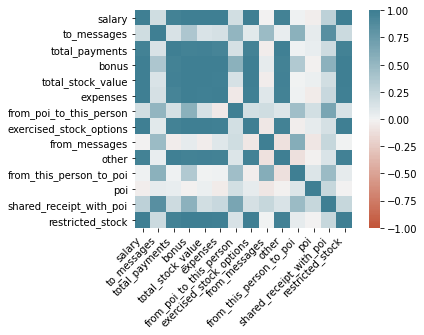

In [9]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
print(df.columns)
target_name = 'poi'
features_list = list(df.columns[df.columns != 'poi'])

Index(['salary', 'to_messages', 'total_payments', 'bonus', 'total_stock_value',
       'expenses', 'from_poi_to_this_person', 'exercised_stock_options',
       'from_messages', 'other', 'from_this_person_to_poi', 'poi',
       'shared_receipt_with_poi', 'restricted_stock'],
      dtype='object')


In [11]:
target_name

'poi'

In [12]:
features_list

['salary',
 'to_messages',
 'total_payments',
 'bonus',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'restricted_stock']

In [13]:
### Task 2: Remove outliers

In [14]:
df.sort_values(by=["total_payments", "salary", "bonus"],na_position= 'first')

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock
CORDES WILLIAM R,NaN,764.0,NaN,NaN,1038185.0,NaN,10.0,651850.0,12.0,NaN,0.0,False,58.0,386335.0
LOWRY CHARLES P,NaN,NaN,NaN,NaN,372205.0,NaN,NaN,372205.0,NaN,NaN,NaN,False,NaN,153686.0
CHAN RONNIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,32460.0
WHALEY DAVID A,NaN,NaN,NaN,NaN,98718.0,NaN,NaN,98718.0,NaN,NaN,NaN,False,NaN,NaN
CLINE KENNETH W,NaN,NaN,NaN,NaN,189518.0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,662086.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAVORATO JOHN J,339288.0,7259.0,10425757.0,8000000.0,5167144.0,49537.0,528.0,4158995.0,2585.0,1552.0,411.0,False,3962.0,1008149.0
BHATNAGAR SANJAY,NaN,523.0,15456290.0,NaN,NaN,NaN,0.0,2604490.0,29.0,137864.0,1.0,False,463.0,-2604490.0
FREVERT MARK A,1060932.0,3275.0,17252530.0,2000000.0,14622185.0,86987.0,242.0,10433518.0,21.0,7427621.0,6.0,False,2979.0,4188667.0
LAY KENNETH L,1072321.0,4273.0,103559793.0,7000000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,True,2411.0,14761694.0


In [15]:
df = df.drop("TOTAL")

In [16]:
poi_df = df[df['poi'] == True]
nonpoi_df = df[df['poi'] == False]

In [17]:
poi_df = poi_df.drop(columns=["poi"])
nonpoi_df = nonpoi_df.drop(columns=["poi"])

In [18]:
nonpoi_df=nonpoi_df.fillna(nonpoi_df.mean()).round()

In [19]:
nonpoi_df

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock
METTS MARK,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,1947752.0,29.0,1740.0,1.0,702.0,585062.0
BAXTER JOHN C,267102.0,2007.0,5634343.0,1200000.0,10623258.0,11200.0,58.0,6680544.0,669.0,2660303.0,36.0,1059.0,3942714.0
ELLIOTT STEVEN,170941.0,2007.0,211725.0,350000.0,6678735.0,78552.0,58.0,4890344.0,669.0,12961.0,36.0,1059.0,1788391.0
CORDES WILLIAM R,262152.0,764.0,1725091.0,986825.0,1038185.0,52846.0,10.0,651850.0,12.0,383128.0,0.0,58.0,386335.0
MORDAUNT KRISTINA M,267093.0,2007.0,628522.0,325000.0,208510.0,35018.0,58.0,1947752.0,669.0,1411.0,36.0,1059.0,208510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MARTIN AMANDA K,349487.0,1522.0,8407016.0,986825.0,2070306.0,8211.0,8.0,2070306.0,230.0,2818454.0,0.0,477.0,931007.0
BUY RICHARD B,330546.0,3523.0,2355702.0,900000.0,3444470.0,52846.0,156.0,2542813.0,1053.0,400572.0,71.0,2333.0,901657.0
GRAMM WENDY L,262152.0,2007.0,119292.0,986825.0,2374085.0,52846.0,58.0,1947752.0,669.0,383128.0,36.0,1059.0,931007.0
TAYLOR MITCHELL S,265214.0,533.0,1092663.0,600000.0,3745048.0,52846.0,0.0,3181250.0,29.0,383128.0,0.0,300.0,563798.0


<AxesSubplot:>

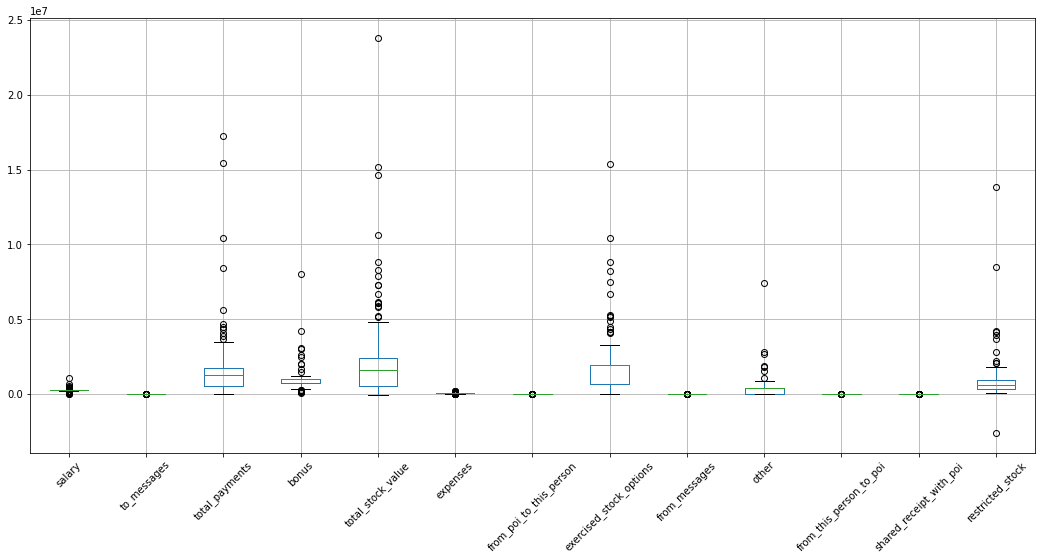

In [20]:
nonpoi_df.boxplot(rot=45, figsize=(18,8))

In [21]:
poi_df = poi_df.fillna(poi_df.mean()).round()

In [22]:
poi_df

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock
HANNON KEVIN P,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,1035.0,853064.0
COLWELL WESLEY,288542.0,1758.0,1490344.0,1200000.0,698242.0,16514.0,240.0,10463794.0,40.0,101740.0,11.0,1132.0,698242.0
RIEKER PAULA H,249201.0,1328.0,1099100.0,700000.0,1918887.0,33271.0,35.0,1635238.0,82.0,1950.0,48.0,1258.0,283649.0
KOPPER MICHAEL J,224305.0,2417.0,2652612.0,800000.0,985032.0,118134.0,98.0,10463794.0,300.0,907502.0,67.0,1783.0,985032.0
SHELBY REX,211844.0,225.0,2003885.0,200000.0,2493616.0,22884.0,13.0,1624396.0,39.0,1573324.0,14.0,91.0,869220.0
DELAINEY DAVID W,365163.0,3093.0,4747979.0,3000000.0,3614261.0,86174.0,66.0,2291113.0,3069.0,1661.0,609.0,2097.0,1323148.0
LAY KENNETH L,1072321.0,4273.0,103559793.0,7000000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,2411.0,14761694.0
BOWEN JR RAYMOND M,278601.0,1858.0,2669589.0,1350000.0,252055.0,65907.0,140.0,10463794.0,27.0,1621.0,15.0,1593.0,252055.0
BELDEN TIMOTHY N,213999.0,7991.0,5501630.0,5249999.0,1110705.0,17355.0,228.0,953136.0,484.0,210698.0,108.0,5521.0,157569.0
FASTOW ANDREW S,440698.0,2417.0,2424083.0,1300000.0,1794412.0,55921.0,98.0,10463794.0,300.0,277464.0,67.0,1783.0,1794412.0


<AxesSubplot:>

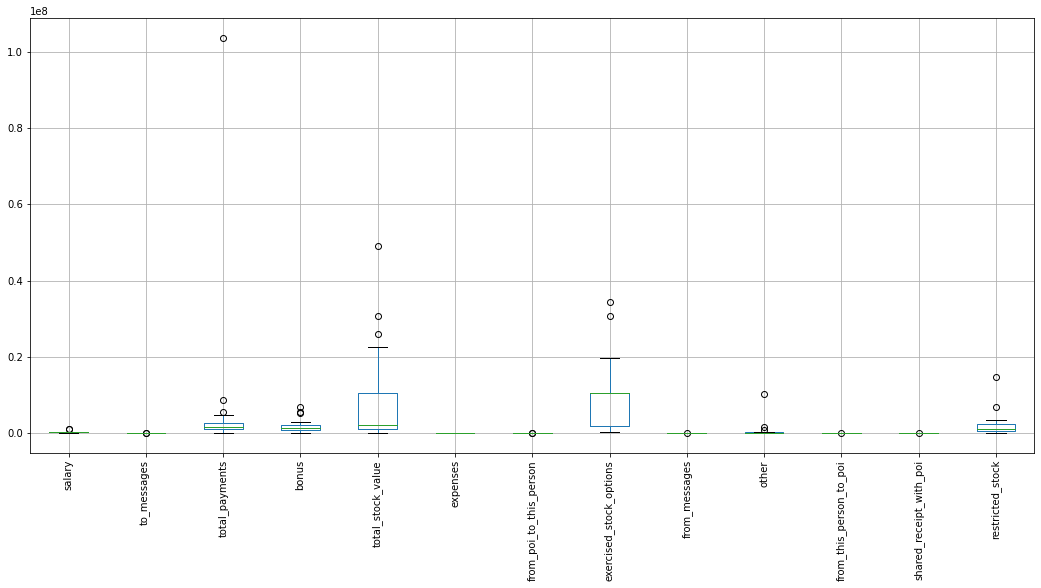

In [23]:
poi_df.boxplot(rot=90, figsize=(18,8))

In [24]:
poi_df.describe().round()

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock
count,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
mean,383445.0,2417.0,7913590.0,2075000.0,9165671.0,59874.0,98.0,10463794.0,300.0,802997.0,67.0,1783.0,2318621.0
std,270049.0,1716.0,23965492.0,1923232.0,13841168.0,37525.0,67.0,9960550.0,705.0,2417568.0,138.0,1106.0,3512702.0
min,158403.0,225.0,91093.0,200000.0,126027.0,16514.0,13.0,384728.0,16.0,486.0,4.0,91.0,126027.0
25%,240965.0,1436.0,1142396.0,850000.0,1016450.0,31323.0,52.0,1799207.0,37.0,4980.0,14.0,1164.0,469924.0
50%,283572.0,2396.0,1754028.0,1325000.0,2206836.0,50448.0,93.0,10463794.0,72.0,149204.0,23.0,1783.0,1116675.0
75%,407253.0,2553.0,2665345.0,2075000.0,10511335.0,84125.0,117.0,10463794.0,300.0,260772.0,67.0,2083.0,2456202.0
max,1111258.0,7991.0,103559793.0,7000000.0,49110078.0,127017.0,240.0,34348384.0,3069.0,10359729.0,609.0,5521.0,14761694.0


In [25]:
nonpoi_df.describe().round()

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock
count,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0
mean,262152.0,2007.0,1725091.0,986825.0,2374085.0,52846.0,58.0,1947752.0,669.0,383128.0,36.0,1059.0,931007.0
std,108133.0,2022.0,2390159.0,836620.0,3242345.0,37061.0,66.0,2128612.0,1486.0,765521.0,64.0,850.0,1566632.0
min,477.0,57.0,148.0,70000.0,-44093.0,148.0,0.0,3285.0,12.0,2.0,0.0,2.0,-2604490.0
25%,239586.0,880.0,551078.0,700000.0,529438.0,35415.0,24.0,664418.0,35.0,2532.0,4.0,562.0,353596.0
50%,262152.0,2007.0,1271582.0,986825.0,1621236.0,52846.0,58.0,1947752.0,669.0,383128.0,36.0,1059.0,630137.0
75%,262726.0,2007.0,1742576.0,986825.0,2374085.0,52846.0,58.0,1947752.0,669.0,383128.0,36.0,1059.0,931007.0
max,1060932.0,15149.0,17252530.0,8000000.0,23817930.0,228763.0,528.0,15364167.0,14368.0,7427621.0,411.0,4527.0,13847074.0


In [61]:
### Task 3: Create feature(s)
my_dataset = nonpoi_df.append(poi_df)
my_dataset['poi'] = df['poi']
my_dataset = my_dataset.sample(frac=1).round()
### Extract features and labels from dataset for local testing
labels = 1*my_dataset.poi.values
features = my_dataset.drop(columns=['poi']).to_numpy().astype(int)


In [62]:
my_dataset

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock,poi
WASAFF GEORGE,259996.0,400.0,1034395.0,325000.0,2056427.0,52846.0,22.0,1668260.0,30.0,1425.0,7.0,337.0,388167.0,False
PAI LOU L,261879.0,2007.0,3123383.0,1000000.0,23817930.0,32047.0,58.0,15364167.0,669.0,1829457.0,36.0,1059.0,8453763.0,False
LAY KENNETH L,1072321.0,4273.0,103559793.0,7000000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,2411.0,14761694.0,True
HICKERSON GARY J,211788.0,1320.0,2081796.0,1700000.0,441096.0,98849.0,40.0,1947752.0,27.0,1936.0,1.0,900.0,441096.0,False
LAVORATO JOHN J,339288.0,7259.0,10425757.0,8000000.0,5167144.0,49537.0,528.0,4158995.0,2585.0,1552.0,411.0,3962.0,1008149.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PICKERING MARK R,655037.0,898.0,1386690.0,300000.0,28798.0,31653.0,7.0,28798.0,67.0,383128.0,0.0,728.0,931007.0,False
BROWN MICHAEL,262152.0,1486.0,49288.0,986825.0,2374085.0,49288.0,13.0,1947752.0,41.0,383128.0,1.0,761.0,931007.0,False
BANNANTINE JAMES M,477.0,566.0,916197.0,986825.0,5243487.0,56301.0,39.0,4046157.0,29.0,864523.0,0.0,465.0,1757552.0,False
ELLIOTT STEVEN,170941.0,2007.0,211725.0,350000.0,6678735.0,78552.0,58.0,4890344.0,669.0,12961.0,36.0,1059.0,1788391.0,False


In [63]:
print(labels)
print(features)

[0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[[   259996       400   1034395 ...         7       337    388167]
 [   261879      2007   3123383 ...        36      1059   8453763]
 [  1072321      4273 103559793 ...        16      2411  14761694]
 ...
 [      477       566    916197 ...         0       465   1757552]
 [   170941      2007    211725 ...        36      1059   1788391]
 [    80818      2007    860136 ...        36      1059    931007]]


In [65]:
scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

In [66]:
features_train, features_test, labels_train, labels_test = train_test_split(scaled_features, labels, test_size=0.3, random_state=42)

In [128]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [67]:
clfs=[(GaussianNB(), dict(pca__n_components=[2, 4, 5, 6])),
      (LogisticRegression(), dict(pca__n_components=[2, 4, 5, 6], 
                                  clf__C=[0.01, 0.1, 1, 10, 100],
                                  clf__max_iter=[150], 
                                  clf__penalty=['l1', 'l2', 'elasticnet'], 
                                  clf__solver=['liblinear', 'lbfgs', 'sag'], 
                                  clf__random_state=[0,1,10,60])), 
      (SVC(), dict(pca__n_components=[2, 4, 5, 6],
                  clf__C=[60, 80, 100, 120],
                  clf__kernel=['linear', 'poly', 'rbf'], 
                  clf__degree=[2, 3, 4, 10], 
                  clf__gamma=['scale', 'auto'])), 
      (DecisionTreeClassifier(), dict(pca__n_components=[2, 4, 5, 6], 
                                    clf__criterion=['gini', 'entropy'], 
                                    clf__splitter=['best', 'random'],
                                    clf__min_samples_split=[10,30,50,70],
                                    clf__min_impurity_decrease=[0.0, 1.0, 2.0], 
                                    clf__random_state=[10, 30, 42, 60])), 
       (SGDClassifier(), dict(pca__n_components=[2, 4, 5, 6], 
                                     clf__alpha=[0.0001, 0.001, 0.01, 0.1], 
                                     clf__loss=['log', 'modified_huber', 'perceptron'], 
                                     clf__penalty=['l2', 'l1', 'elasticnet'], 
                                     clf__early_stopping=[True],
                                     clf__learning_rate=['constant', 'optimal', 'invscaling', 'adaptive'], 
                                     clf__eta0=[0.001, 0.01, 0.1],
                                     clf__random_state= [0, 1, 10, 60])), 
      (AdaBoostClassifier(), dict(pca__n_components=[2, 4, 5, 6], 
                                     clf__learning_rate=[0.01, 0.05, 0.1, 1.0], 
                                     clf__random_state=[10, 20, 30, 42], 
                                     clf__n_estimators=[100])), 
      (RandomForestClassifier(), dict(pca__n_components=[4], 
                                     clf__criterion=['gini', 'entropy'], 
                                     clf__max_features=['auto', 'sqrt', 'log2'],
                                     clf__min_samples_split=[18], 
                                     clf__class_weight=['balanced', 'balanced_subsample'], 
                                     clf__random_state=[60], 
                                     clf__n_estimators=[60]))]

#10,30,50,70

In [68]:
estimators = [('pca', PCA()), ('clf', GaussianNB())]
pipe = Pipeline(estimators)

In [69]:
for classifier, param_grid in clfs:
    pipe.set_params(clf = classifier)
    clf = GridSearchCV(pipe, param_grid=param_grid, cv=5, 
                       scoring=['precision', 'recall'], refit='recall')
    print(classifier)
    print('__________________________________________')
    t0 = time()
    clf.fit(features_train, labels_train)
    print ("done in %0.3fs" % (time() - t0))
    print(clf.best_estimator_)
    
    #best_PCA = clf.best_estimator_.named_steps['pca']
    #best_PCA.fit(features_train)
    
    #x_train_PCA=best_PCA.transform(features_train)
    #x_test_PCA=best_PCA.transform(features_test)
    
    pred=clf.predict(features_train)
    print("Dados de treino")
    print("precision:")
    print(precision_score(labels_train, pred))
    print("recall:")
    print(recall_score(labels_train, pred))
    print("accuracy:")
    print(accuracy_score(labels_train, pred))
    
    print('\n')
    
    pred=clf.predict(features_test)
    print("Dados de teste")
    print("precision:")
    print(precision_score(labels_test, pred))
    print("recall:")
    print(recall_score(labels_test, pred))
    print("accuracy:")
    print(accuracy_score(labels_test, pred))
    
    print('\n\n')
    print('__________________________________________')

GaussianNB()
__________________________________________
done in 0.216s
Pipeline(steps=[('pca', PCA(n_components=2)), ('clf', GaussianNB())])
Dados de treino
precision:
0.4
recall:
0.2857142857142857
accuracy:
0.8415841584158416


Dados de teste
precision:
0.5
recall:
0.5
accuracy:
0.9090909090909091



__________________________________________
LogisticRegression()
__________________________________________
done in 28.047s
Pipeline(steps=[('pca', PCA(n_components=6)),
                ('clf',
                 LogisticRegression(C=100, max_iter=150, penalty='l1',
                                    random_state=0, solver='liblinear'))])
Dados de treino
precision:
0.8888888888888888
recall:
0.5714285714285714
accuracy:
0.9306930693069307


Dados de teste
precision:
0.6
recall:
0.75
accuracy:
0.9318181818181818



__________________________________________
SVC()
__________________________________________
done in 69.466s
Pipeline(steps=[('pca', PCA(n_components=6)),
                ('clf', 

In [36]:
clf1 = SVC(C=100, kernel='poly')
#clf1=LogisticRegression(C=100, max_iter=150, penalty='l1',random_state=0, solver='liblinear')
clf2 = RandomForestClassifier(class_weight='balanced',
                              min_samples_split=18, n_estimators=60, random_state=60)
clf3 = AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=10)
#clf4 = 
eclf1 = VotingClassifier(estimators=[('svc', clf1), ('rf', clf2), ('abc', clf3)], voting='hard')

In [37]:
pca = PCA(n_components=5)
pca.fit(features_train)
x_train_PCA=pca.transform(features_train)
x_test_PCA=pca.transform(features_test)

t0 = time()
eclf1.fit(x_train_PCA, labels_train)
print ("done in %0.3fs" % (time() - t0))
    
pred=eclf1.predict(x_train_PCA)
print("Dados de treino")
print("precision:")
print(precision_score(labels_train, pred))
print("recall:")
print(recall_score(labels_train, pred))
print("accuracy:")
print(accuracy_score(labels_train, pred))
    
print('\n')
    
pred=eclf1.predict(x_test_PCA)
print("Dados de teste")
print("precision:")
print(precision_score(labels_test, pred))
print("recall:")
print(recall_score(labels_test, pred))
print("accuracy:")
print(accuracy_score(labels_test, pred))

done in 0.596s
Dados de treino
precision:
1.0
recall:
0.8571428571428571
accuracy:
0.9801980198019802


Dados de teste
precision:
1.0
recall:
0.25
accuracy:
0.9318181818181818


In [38]:
best = [('pca', PCA(n_components=5)), ('clf', VotingClassifier(estimators=[('svc', clf1), ('rf', clf2), ('abc', clf3)]))]
pipe=Pipeline(best)
param_grid=dict(clf__voting=['hard'])
clf = GridSearchCV(pipe, param_grid=param_grid)
clf.fit(features_train, labels_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                       ('clf',
                                        VotingClassifier(estimators=[('svc',
                                                                      SVC(C=100,
                                                                          kernel='poly')),
                                                                     ('rf',
                                                                      RandomForestClassifier(class_weight='balanced',
                                                                                             min_samples_split=18,
                                                                                             n_estimators=60,
                                                                                             random_state=60)),
                                                                     ('abc',
                           

In [ ]:
#estimators = [('pca', PCA()), ('clf', GaussianNB())]
#pipe = Pipeline(estimators)
#param_grid = dict(pca__n_components=[3, 4, 5, 6])
#clf = GridSearchCV(pipe, param_grid=param_grid)
#t0 = time()
#clf.fit(features_train, labels_train)
#print ("done in %0.3fs" % (time() - t0))
#clf.best_estimator_

In [ ]:
#best_PCA = clf.best_estimator_.named_steps['pca']
#best_PCA.fit(features_train)
#x_train_PCA=best_PCA.transform(features_train)
#x_test_PCA=best_PCA.transform(features_test)

In [ ]:
#checar com dados de teste
#pred=clf.predict(features_test)
#print("Dados de teste")
#print("precision:")
#print(precision_score(labels_test, pred))
#print("\n")
#print("recall:")
#print(recall_score(labels_test, pred))
#print("\n")
#print("accuracy:")
#print(accuracy_score(labels_test, pred))

from sklearn.svm import SVC

estimators = [('reduce_dim', PCA()), ('svm_clf', SVC())]
pipe = Pipeline(estimators)
param_grid = dict(reduce_dim__n_components=[2, 3, 4, 5],
                  svm_clf__C=[60, 80, 100, 120],
                  svm_clf__kernel= ['linear', 'poly', 'rbf'], 
                  svm_clf__degree= [2, 3, 4, 10], 
                  svm_clf__gamma=['scale', 'auto'])
clf = GridSearchCV(pipe, param_grid=param_grid)
t0 = time()
clf.fit(X_PCA_train, labels_train)
print ("done in %0.3fs" % (time() - t0))
clf.best_estimator_

estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
param_grid = dict(reduce_dim__n_components=[2, 5, 10], clf__C=[0.1, 10, 100])
clf = GridSearchCV(pipe, param_grid=param_grid) #classifier
clf.fit(X, Y)
clf.best_estimator_
#checar com dados de treino
pred=clf.predict(X_PCA_train)
precision_score(labels_train, pred)
recall_score(labels_train, pred)
accuracy_score(labels_train, pred)
#checar com dados de teste
pred=clf.predict(X_PCA_test)
precision_score(labels_test, pred)
recall_score(labels_test, pred)
accuracy_score(labels_test, pred)

In [ ]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
#from sklearn.cross_validation import train_test_split
#features_train, features_test, labels_train, labels_test = \
    #train_test_split(features, labels, test_size=0.3, random_state=42)

In [43]:
scaler.fit(my_dataset)
my_dataset = scaler.transform(my_dataset)
my_dataset

array([[2.35577490e-01, 1.29207527e-01, 1.66565171e-02, ...,
        1.91520203e-01, 2.03585140e-01, 0.00000000e+00],
       [2.35577490e-01, 1.29207527e-01, 1.76051202e-03, ...,
        1.91520203e-01, 2.03585140e-01, 0.00000000e+00],
       [2.35577490e-01, 1.29207527e-01, 8.19276659e-04, ...,
        1.91520203e-01, 2.03585140e-01, 0.00000000e+00],
       ...,
       [2.35577490e-01, 4.38642990e-02, 1.66565171e-02, ...,
        1.06359848e-01, 1.70902139e-01, 0.00000000e+00],
       [1.42175640e-01, 1.56374238e-01, 3.47772532e-03, ...,
        3.22703388e-01, 3.55904095e-01, 1.00000000e+00],
       [2.45235559e-01, 1.29207527e-01, 2.07303241e-02, ...,
        1.91520203e-01, 1.75374509e-01, 0.00000000e+00]])

In [40]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)